# Experiments with regression trees

In [13]:
import numpy as np
import pylab as pl
import models

## Generate synthetic data 
Simulate data from crazy function and add Gaussian noise.
n is the number of examples to simulate.

In [14]:
def generate_synthetic_1d_data(n):
    X = np.random.uniform(-20, 20, size=n)
    X.sort()
    # Crazy function without noise
    y_noiseless = np.cos(X) * X
    # Add gaussian noise to each data point
    y = y_noiseless + np.random.normal(0, 1.5, size=n)
    X = X.reshape((n,1))
    return X, y, y_noiseless

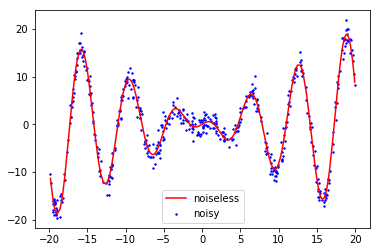

In [15]:
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

pl.scatter(X, y, c='b', s=2, label='noisy');
pl.plot(X, y_noiseless, c='r', label='noiseless')
pl.legend(loc='best');

## Regression trees
Visualize regression tree predictions on synthetic data as a function of the maximum depth (max_depth) of the tree.

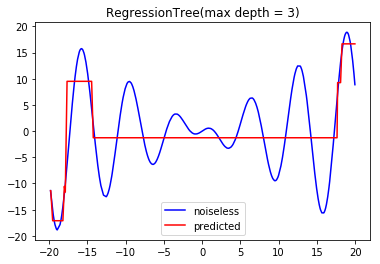

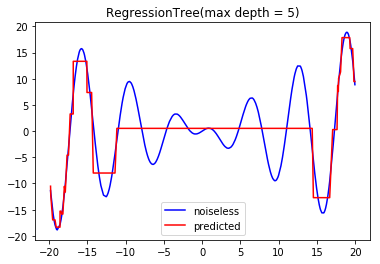

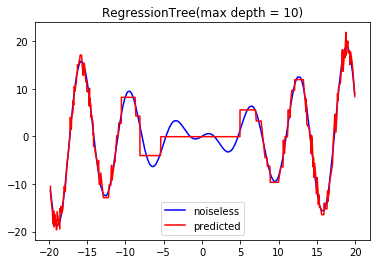

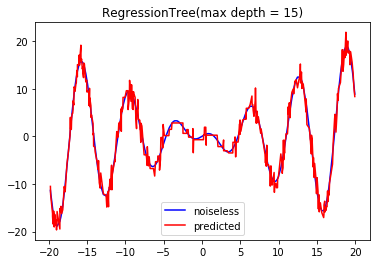

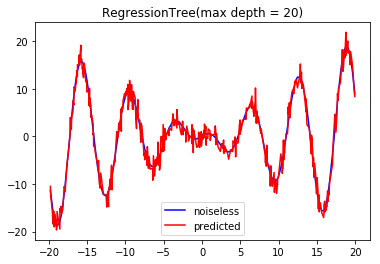

In [16]:
for max_depth in [3, 5, 10, 15, 20]:
    # Fit regression tree
    rt = models.RegressionTree(nfeatures = X.shape[1], max_depth = max_depth)
    rt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'RegressionTree(max depth = {max_depth})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, rt.predict(X), c='r', label='predicted')
    pl.legend(loc='best'); 

## Gradient-boosted regression tree (GBRT) boosting iteration number
Visualize GBRT predictions on sythetic data as a function of the number of number of boosting iterations (n_estimator) used to create the GBRT.

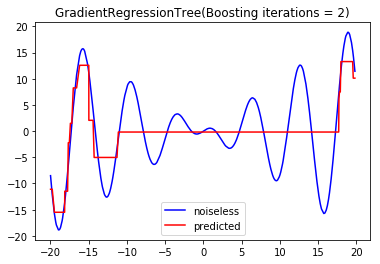

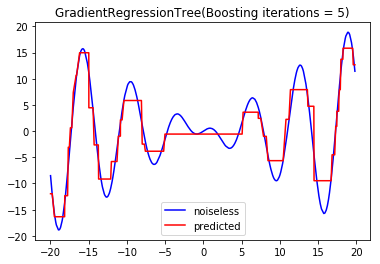

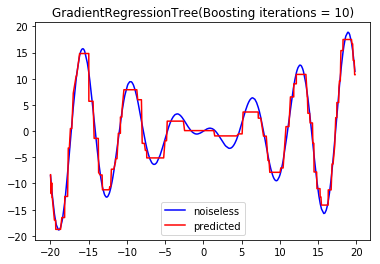

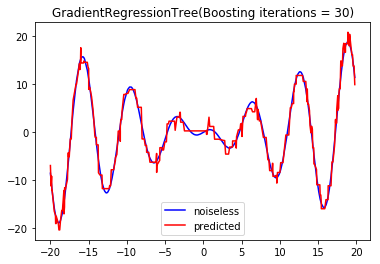

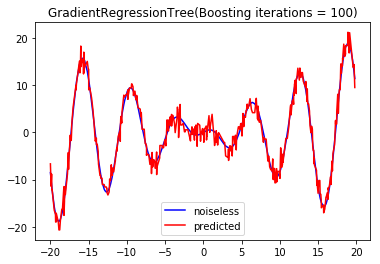

In [17]:
# GBRT hyper-parameters
max_depth=3
regularization_parameter=.75
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

for n_estimator in [2, 5, 10, 30, 100]:
    # Fit the GBR
    gbrt = models.GradientBoostedRegressionTree(
        nfeatures = X.shape[1], 
        max_depth = max_depth, 
        n_estimators = n_estimator, 
        regularization_parameter = regularization_parameter
    )
    gbrt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'GradientRegressionTree(Boosting iterations = {n_estimator})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, gbrt.predict(X), c='r', label='predicted')
    pl.legend(loc='best');


## Gradient-boosted regression tree (GBRT) regularization parameter
Visualize GBRT predictions on sythetic data as a function of the number of number of the regularization parameter

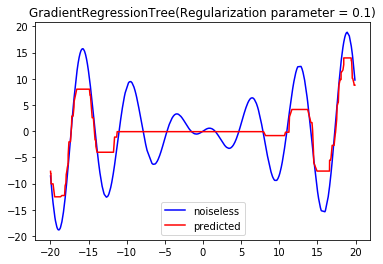

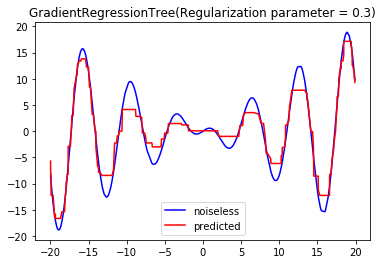

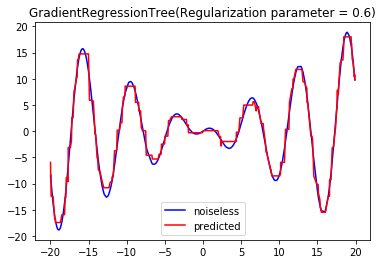

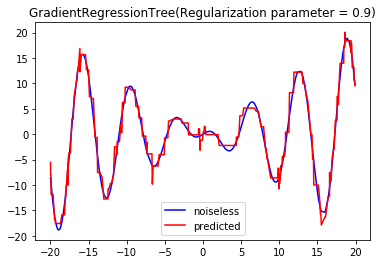

In [12]:
# GBRT hyper-parameters
max_depth=3
n_estimators=20
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

for regularization_parameter in [.1, .3, .6, .9]:
    # Fit the GBR
    gbrt = models.GradientBoostedRegressionTree(
        nfeatures = X.shape[1], 
        max_depth = max_depth, 
        n_estimators = n_estimators, 
        regularization_parameter = regularization_parameter
    )
    gbrt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'GradientRegressionTree(Regularization parameter = {regularization_parameter})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, gbrt.predict(X), c='r', label='predicted')
    pl.legend(loc='best');

## Summary 
At this point, you have successfully run all three experiments in this notebook. Please summarize the empirical results. Try to consider:

1. Explain the qualitative differences in regression learned as a function of depth. Should we set the max depth very high or very low?

It doesn't take much depth for overfitting to become an apparent problem, as demonstrated by a lack of smoothness as the model attempts to capture the noise as well as the underlying distribution.  A _very_ low depth would lead to underfitting, but the results suggest a low max depth works better than a large one.  It would appear that an ideal max depth lies around 5, though with boosting the depth-3 trees do a good job.  

2. Differences in how regression trees and GBRTs fit the data.

Overall the GBRTs do a better job fitting the data.  The regression trees struggle to balance overfitting and underfitting - the model is able to accurately fit the more extreme values (further from zero) even at low depth, but at this point it underfits the values that are closer to zero.  Increasing the depth improves the accuracy of these near-zero values, but this leads to overfitting near the more extreme values.  GBRTs are able to obtain higher resolution even at low depth, as demonstrated with 10 boosting iterations.  Overfitting, especially in values closer to zero, does begin to occur for greater numbers of boosting iterations.

3. The trade-off between the regularization parameter and the number of boosting iterations in the GBRT.

Increasing the number of boosting iterations improves accuracy (up to the point of overfitting) while also dramatically increasing computational cost (a new regression tree is fitted for each additional boosting iteration).  Increasing the regularization parameter increases the impact of each boosting tree, at the potential cost of overfitting once again.  We can see that overfitting begins to occur at 30 iterations when the regularization parameter is held constant at 0.75.  When the number of boosting iterations is held constant at 20, we see overfitting begin to occur at 0.6, though it is relatively minor and the rest of the fit to the model is quite accurate.  It seems that a max depth of 3-5, with ~20 boosting iterations, and a regularization parameter around 0.5-0.7 would yield the most accurate results.